In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
menu = pd.read_csv('menu.csv')

In [3]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
serving_size_conv = []
for i in menu['Serving Size']:
    if '(' in i and 'g)' in i:
        serving_size_conv.append(float(i[i.find('(')+1:-3])) 
    elif 'fl oz' in i:
        serving_size_conv.append(float(i[0:i.find(' ')])*29.5735) ## assume 1 fl oz = 29.5735 g
    elif '(' and 'ml)':
        serving_size_conv.append(float(i[i.find('(')+1:-4])*1.04) ## assume 1 ml = 1.04g

menu['Serving Size']= pd.DataFrame(serving_size_conv).astype('float')
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [6]:
menu.shape

(260, 24)

In [7]:
menu.isnull().values.any()

False

In [8]:
menu['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

# Problem 1

How many calories does the average McDonald's value meal contain?

In [9]:
menu["Category"].value_counts() # frequency table

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [10]:
menu_meal = menu[(menu["Category"] == 'Breakfast') | (menu["Category"] == 'Chicken & Fish') | 
                 (menu["Category"] == 'Beef & Pork') | (menu["Category"] == 'Snacks & Sides') |
                (menu["Category"] == 'Desserts') | (menu["Category"] == 'Salads')]
menu_meal["Category"].value_counts()

Breakfast         42
Chicken & Fish    27
Beef & Pork       15
Snacks & Sides    13
Desserts           7
Salads             6
Name: Category, dtype: int64

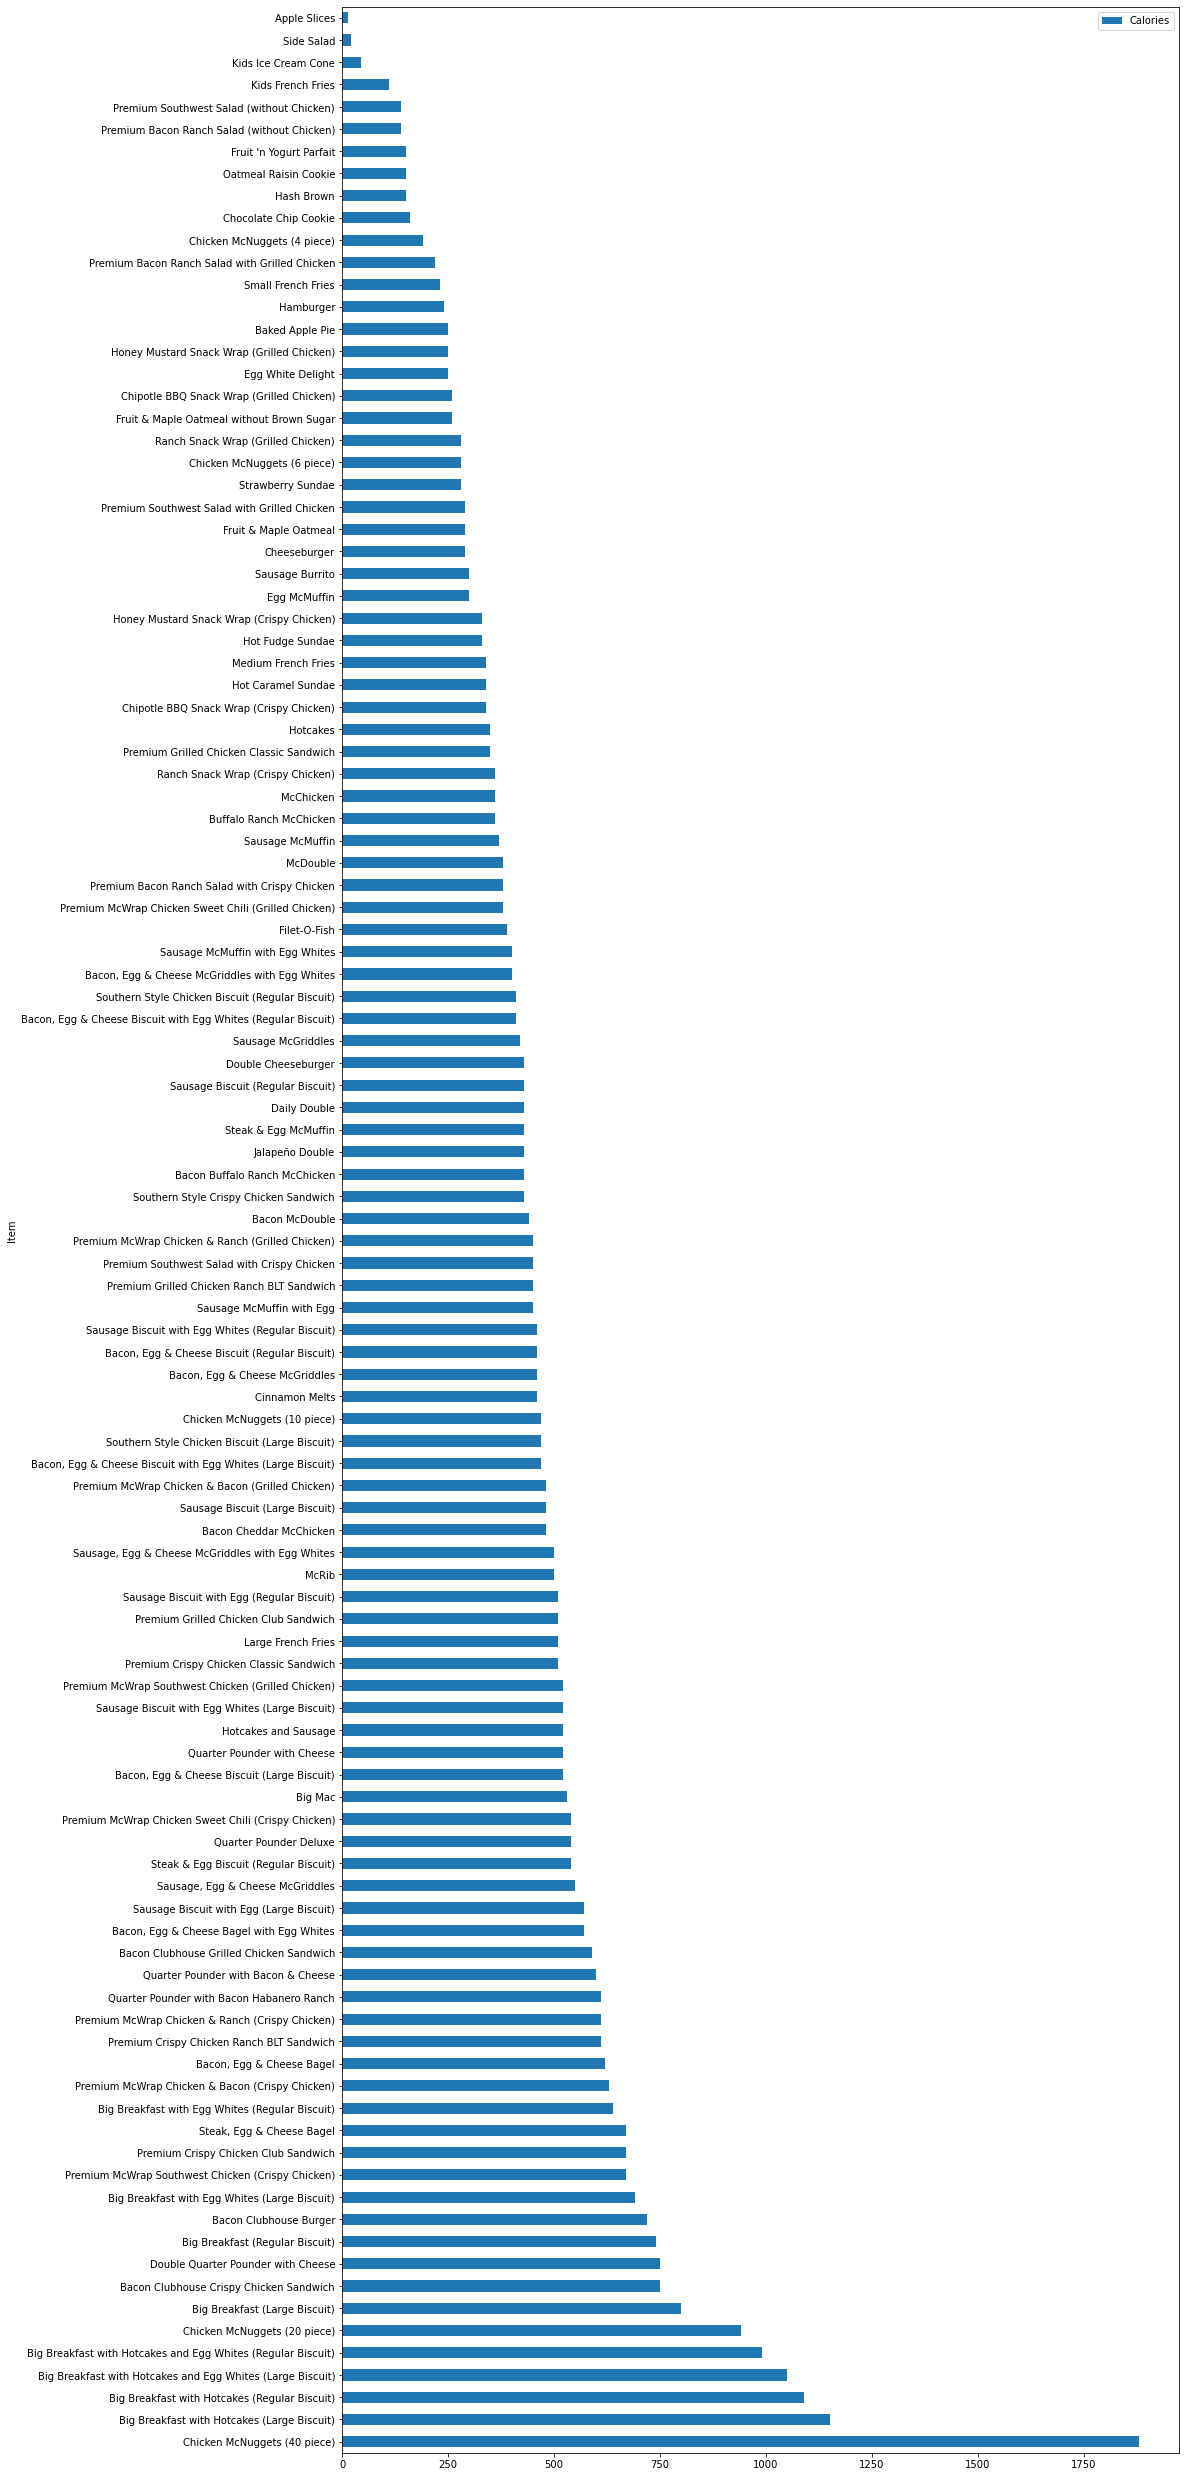

In [11]:
menu_meal_cal = pd.DataFrame({'Item': menu_meal['Item'], 'Calories': menu_meal['Calories']})
menu_meal_cal.sort_values('Calories', ascending=False).plot.barh(x='Item', y='Calories', figsize= (15,45))
plt.show()

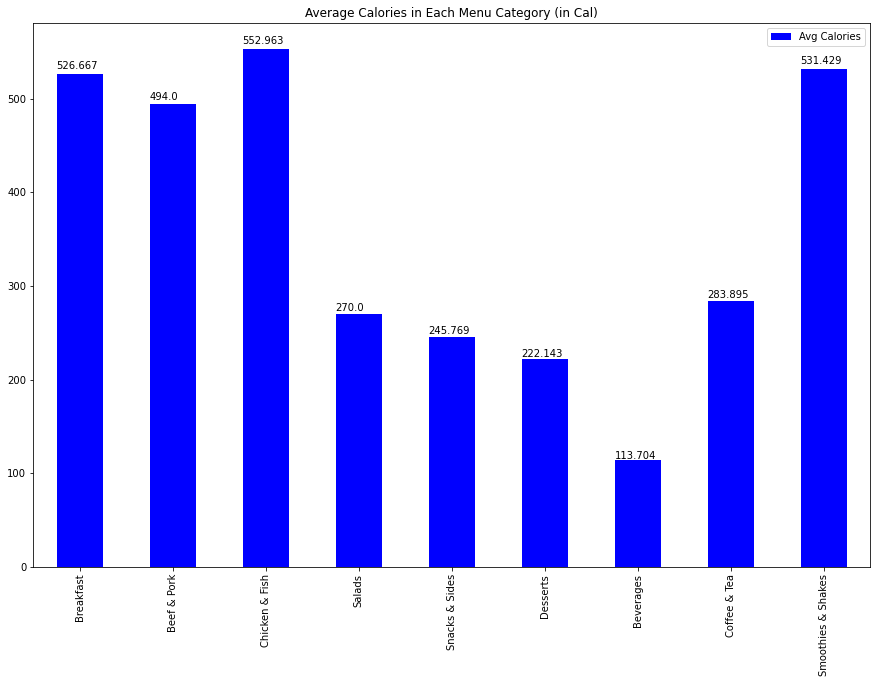

In [12]:
## Average calories on each categories

#dataframes for each category
brfast = menu.loc[menu["Category"] == 'Breakfast']
bnp = menu.loc[menu["Category"] == 'Beef & Pork']
cnf = menu.loc[menu["Category"] == 'Chicken & Fish']
salad = menu.loc[menu["Category"] == 'Salads']
snns = menu.loc[menu["Category"] == 'Snacks & Sides']
dess = menu.loc[menu["Category"] == 'Desserts'] 
bevg = menu.loc[menu["Category"] == 'Beverages']
cnt = menu.loc[menu["Category"] == 'Coffee & Tea']
smns = menu.loc[menu["Category"] == 'Smoothies & Shakes']

avg_meal_cat = [round(brfast['Calories'].mean(), 3), round(bnp['Calories'].mean(), 3), 
           round(cnf['Calories'].mean(), 3), round(salad['Calories'].mean(), 3), 
           round(snns['Calories'].mean(), 3), round(dess['Calories'].mean(), 3),
           round(bevg['Calories'].mean(), 3), round(cnt['Calories'].mean(), 3), 
           round(smns['Calories'].mean(), 3)]
index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes']
avg_calat= pd.DataFrame({'Avg Calories': avg_meal_cat}, index=index)
ax = avg_calat.plot.bar(color='blue', figsize=(15,10), title='Average Calories in Each Menu Category (in Cal)', legend=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

In [13]:
print("Average calories of all McD's meals (include drinks) is ", 
      round(menu['Calories'].mean(), 3), "Cal.") 
print("Average calories of all McD's meals (drinks excluded) is ", 
      round(menu_meal['Calories'].mean(), 3), "Cal.")

Average calories of all McD's meals (include drinks) is  368.269 Cal.
Average calories of all McD's meals (drinks excluded) is  462.091 Cal.


# Problem 2

How much do beverages, like soda or coffee, contribute to the overall caloric intake?

note: Secara umum, kebutuhan kalori per hari rata-rata pria dewasa adalah 2.500 kalori, sedangkan perempuan dewasa adalah sekitar 2.000 kalori. -https://www.alodokter.com/-

1. Beverages

In [14]:
bevg_cal = pd.DataFrame({'Item': bevg['Item'], 'Calories': bevg['Calories']})
bevg_cal['Men'] = (bevg_cal['Calories']/2500)*100
bevg_cal['Women'] = (bevg_cal['Calories']/2000)*100
bevg_cal

,Item,Calories,Men,Women
110,Coca-Cola Classic (Small),140,5.6,7.0
111,Coca-Cola Classic (Medium),200,8.0,10.0
112,Coca-Cola Classic (Large),280,11.2,14.0
113,Coca-Cola Classic (Child),100,4.0,5.0
114,Diet Coke (Small),0,0.0,0.0
115,Diet Coke (Medium),0,0.0,0.0
116,Diet Coke (Large),0,0.0,0.0
117,Diet Coke (Child),0,0.0,0.0
118,Dr Pepper (Small),140,5.6,7.0
119,Dr Pepper (Medium),190,7.6,9.5


In [15]:
# Average Calories in 'Beverages' Category
avg_bevg = bevg['Calories'].mean()
print("Average calories of 'Beverages' category is", round(avg_bevg, 3))

avg_bevg = pd.to_numeric(avg_bevg) 
bevg_men = (avg_bevg/2500)*100
print("Averagely 'Beverages' contributes to men's calories intake for ", round(bevg_men,3), "%")

bevg_women = (avg_bevg/2000)*100
print("Averagely 'Beverages' contributes to women's calories intake for ", round(bevg_women, 3), "%")

Average calories of 'Beverages' category is 113.704
Averagely 'Beverages' contributes to men's calories intake for  4.548 %
Averagely 'Beverages' contributes to women's calories intake for  5.685 %


2. Coffee and Tea

In [16]:
cnt_cal = pd.DataFrame({'Item': cnt['Item'], 'Calories': cnt['Calories']})
cnt_cal['Men'] = (cnt_cal['Calories']/2500)*100
cnt_cal['Women'] = (cnt_cal['Calories']/2000)*100
cnt_cal

,Item,Calories,Men,Women
137,Iced Tea (Small),0,0.0,0.0
138,Iced Tea (Medium),0,0.0,0.0
139,Iced Tea (Large),0,0.0,0.0
140,Iced Tea (Child),0,0.0,0.0
141,Sweet Tea (Small),150,6.0,7.5
...,...,...,...,...
227,Frappé Caramel (Medium),550,22.0,27.5
228,Frappé Caramel (Large),670,26.8,33.5
229,Frappé Chocolate Chip (Small),530,21.2,26.5
230,Frappé Chocolate Chip (Medium),630,25.2,31.5


In [17]:
# Average Calories in 'Coffee & Tea' Category
avg_cnt = cnt['Calories'].mean()
print("Average calories of 'Coffee & Tea' category is", round(avg_cnt, 3))

avg_cnt = pd.to_numeric(avg_cnt) 
cnt_men = (avg_cnt/2500)*100
print("Averagely 'Coffee & Tea' contributes to men's calories intake for ", round(cnt_men,3), "%")

cnt_women = (avg_cnt/2000)*100
print("Averagely 'Coffee & Tea' contributes to women's calories intake for ", round(cnt_women, 3), "%")

Average calories of 'Coffee & Tea' category is 283.895
Averagely 'Coffee & Tea' contributes to men's calories intake for  11.356 %
Averagely 'Coffee & Tea' contributes to women's calories intake for  14.195 %


In [18]:
smns_cal = pd.DataFrame({'Item': smns['Item'], 'Calories': smns['Calories']})
smns_cal['Men'] = (smns_cal['Calories']/2500)*100
smns_cal['Women'] = (smns_cal['Calories']/2000)*100
smns_cal

,Item,Calories,Men,Women
232,Blueberry Pomegranate Smoothie (Small),220,8.8,11.0
233,Blueberry Pomegranate Smoothie (Medium),260,10.4,13.0
234,Blueberry Pomegranate Smoothie (Large),340,13.6,17.0
235,Strawberry Banana Smoothie (Small),210,8.4,10.5
236,Strawberry Banana Smoothie (Medium),250,10.0,12.5
237,Strawberry Banana Smoothie (Large),330,13.2,16.5
238,Mango Pineapple Smoothie (Small),210,8.4,10.5
239,Mango Pineapple Smoothie (Medium),260,10.4,13.0
240,Mango Pineapple Smoothie (Large),340,13.6,17.0
241,Vanilla Shake (Small),530,21.2,26.5


In [19]:
# Average Calories in 'Smoothies & Shakes' Category
avg_smns = smns['Calories'].mean()
print("Average calories of 'Smoothies & Shakes' category is", round(avg_smns, 3))

avg_smns = pd.to_numeric(avg_smns) 
smns_men = (avg_smns/2500)*100
print("Averagely 'Smoothies & Shakes' contributes to men's calories intake for ", round(smns_men,3), "%")

smns_women = (avg_smns/2000)*100
print("Averagely 'Smoothies & Shakes' contributes to women's calories intake for ", round(smns_women, 3), "%")

Average calories of 'Smoothies & Shakes' category is 531.429
Averagely 'Smoothies & Shakes' contributes to men's calories intake for  21.257 %
Averagely 'Smoothies & Shakes' contributes to women's calories intake for  26.571 %


In [20]:
menu_drink = menu[(menu["Category"] == 'Beverages') | (menu["Category"] == 'Coffee & Tea') | 
                 (menu["Category"] == 'Smoothies & Shakes')]
menu_drink['Category'].value_counts()

Coffee & Tea          95
Smoothies & Shakes    28
Beverages             27
Name: Category, dtype: int64

In [21]:
avg_drink = menu_drink['Calories'].mean()
print("Average calories of all drinks is", round(avg_drink, 3))

avg_drink = pd.to_numeric(avg_drink)
drink_men = (avg_drink/2500)*100
print("Averagely drink options contributes to men's calories intake for ", round(drink_men, 3), "%")

drink_women = (avg_drink/2000)*100
print("Averagely drink options contributes to women's calories intake for ", round(drink_women, 3), "%")

Average calories of all drinks is 299.467
Averagely drink options contributes to men's calories intake for  11.979 %
Averagely drink options contributes to women's calories intake for  14.973 %


# Problem 3

Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

note : There are five major classes of nutrients:  lipids (fat, colesterol), proteins, carbohydrates (carbohydrates, sugar and Dietary Fiber), vitamins (A and C), and minerals(Sodium, Calsium and Iron).

1. Fat

In [22]:
crispy_sand = menu[menu['Item'].str.contains('Sandwich')]
crispy_sand.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,213.0,510,200,22.0,33,3.5,18,0.0,...,55,18,3,13,10,24,4,6,15,20
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,200.0,350,80,9.0,13,2.0,9,0.0,...,42,14,3,13,8,28,4,8,15,20
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,249.0,670,300,33.0,51,9.0,44,0.0,...,58,19,3,14,11,36,8,20,30,20
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,235.0,510,180,20.0,31,7.0,36,0.0,...,44,15,3,13,9,40,8,20,30,20
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,230.0,610,250,28.0,43,6.0,31,0.0,...,57,19,3,13,11,32,4,20,15,20


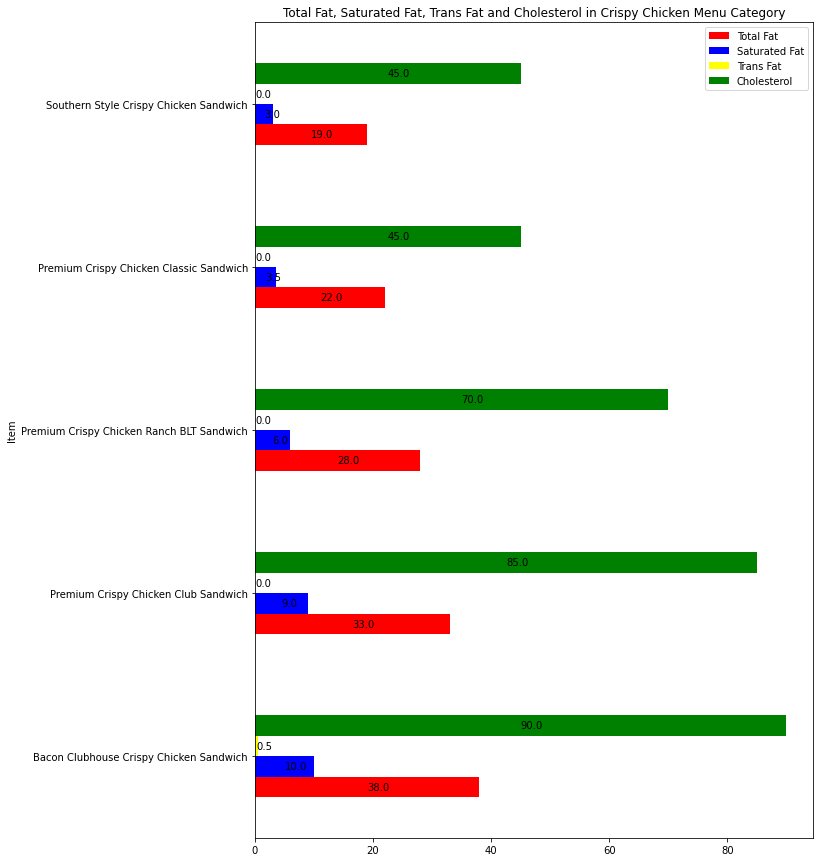

In [23]:
crispy = crispy_sand[crispy_sand['Item'].str.contains('Crispy Chicken')]
crispy_fat = pd.DataFrame({'Item':crispy['Item'], 'Total Fat':crispy['Total Fat'],
                           'Saturated Fat':crispy['Saturated Fat'], 'Trans Fat':crispy['Trans Fat'],
                           'Cholesterol':crispy['Cholesterol']})
ax = crispy_fat.sort_values('Total Fat', ascending=False).plot.barh(x='Item', y=['Total Fat','Saturated Fat', 'Trans Fat','Cholesterol'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green'])
ax.set_title("Total Fat, Saturated Fat, Trans Fat and Cholesterol in Crispy Chicken Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

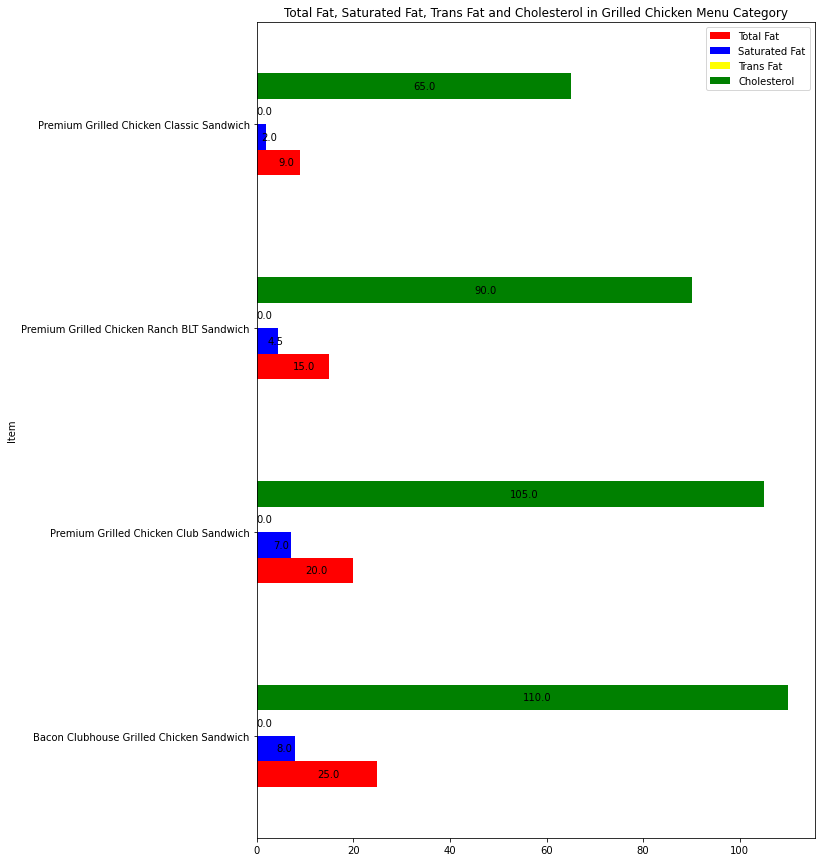

In [24]:
grilled = crispy_sand[crispy_sand['Item'].str.contains('Grilled Chicken')]
grilled_fat = pd.DataFrame({'Item':grilled['Item'], 'Total Fat':grilled['Total Fat'],
                           'Saturated Fat':grilled['Saturated Fat'], 'Trans Fat':grilled['Trans Fat'],
                           'Cholesterol':grilled['Cholesterol']})
ax = grilled_fat.sort_values('Total Fat', ascending=False).plot.barh(x='Item', y=['Total Fat','Saturated Fat', 'Trans Fat', 'Cholesterol'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green'])
ax.set_title("Total Fat, Saturated Fat, Trans Fat and Cholesterol in Grilled Chicken Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [25]:
# Get the average of Fat amount in Crispy Chicken category
avg_crispy_totfat = round(crispy['Total Fat'].mean(), 3)
avg_crispy_satfat = round(crispy['Saturated Fat'].mean(), 3)
avg_crispy_tranfat = round(crispy['Trans Fat'].mean(), 3)
avg_crispy_col = round(crispy['Cholesterol'].mean(), 3)
print("1. The average amount of Total Fat in Crispy Chicken category is", avg_crispy_totfat, ", the average amount of Saturated Fat is", avg_crispy_satfat, ",\nthe average amonut of Trans fat is", avg_crispy_tranfat, ", and average amount of Colesterol is", avg_crispy_col)


avg_grilled_totfat = round(grilled['Total Fat'].mean(), 3)
avg_grilled_satfat = round(grilled['Saturated Fat'].mean(), 3)
avg_grilled_tranfat = round(grilled['Trans Fat'].mean(), 3)
avg_grilled_col = round(grilled['Cholesterol'].mean(), 3)
print("2. The average amount of Total Fat in Grilled Chicken category is", avg_grilled_totfat, ", the average amount of Saturated Fat is", avg_grilled_satfat, ",\nthe average amonut of Trans fat is", avg_grilled_tranfat, ", and average amount of Colesterol is", avg_grilled_col)

1. The average amount of Total Fat in Crispy Chicken category is 28.0 , the average amount of Saturated Fat is 6.3 ,
the average amonut of Trans fat is 0.1 , and average amount of Colesterol is 67.0
2. The average amount of Total Fat in Grilled Chicken category is 17.25 , the average amount of Saturated Fat is 5.375 ,
the average amonut of Trans fat is 0.0 , and average amount of Colesterol is 92.5


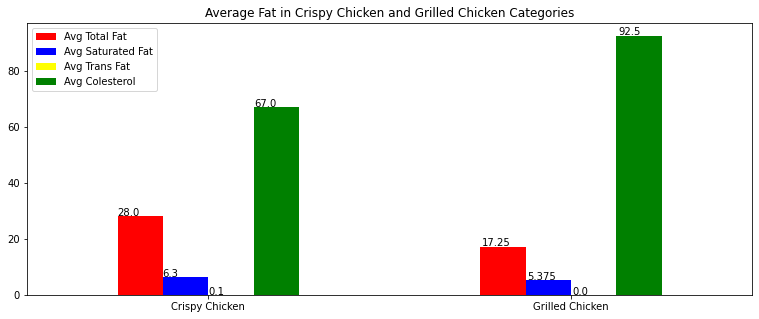

In [26]:
# Plot a bar chart for visual comparison
avg_totfat = [avg_crispy_totfat, avg_grilled_totfat]
avg_satfat = [avg_crispy_satfat, avg_grilled_satfat]
avg_tranfat = [avg_crispy_tranfat, avg_grilled_tranfat]
avg_col = [avg_crispy_col, avg_grilled_col]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_fat = pd.DataFrame({'Avg Total Fat': avg_totfat,
                   'Avg Saturated Fat': avg_satfat,
                       'Avg Trans Fat': avg_tranfat,
                       'Avg Colesterol': avg_col}, index=index)
ax = avg_fat.plot.bar(rot=0, color=['red', 'blue', 'yellow', 'green'], figsize=(13,5))
ax.set_title("Average Fat in Crispy Chicken and Grilled Chicken Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

2. Protein

Text(0.5, 1.0, 'Total Protein in Crispy Chicken Item Category')

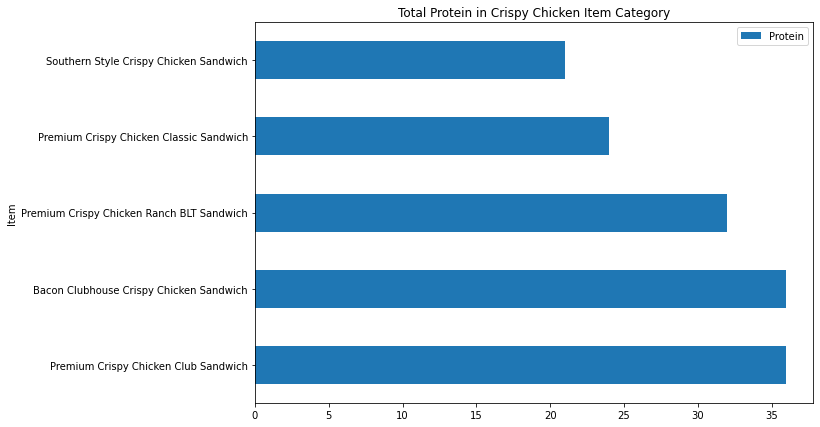

In [27]:
crispy_prot = pd.DataFrame({'Item':crispy['Item'], 'Protein':crispy['Protein']})
ax = crispy_prot.sort_values('Protein', ascending=False).plot.barh(x='Item', y='Protein', figsize= (10,7))
ax.set_title("Total Protein in Crispy Chicken Item Category")

Text(0.5, 1.0, 'Total Protein in Grilled Chicken Item Category')

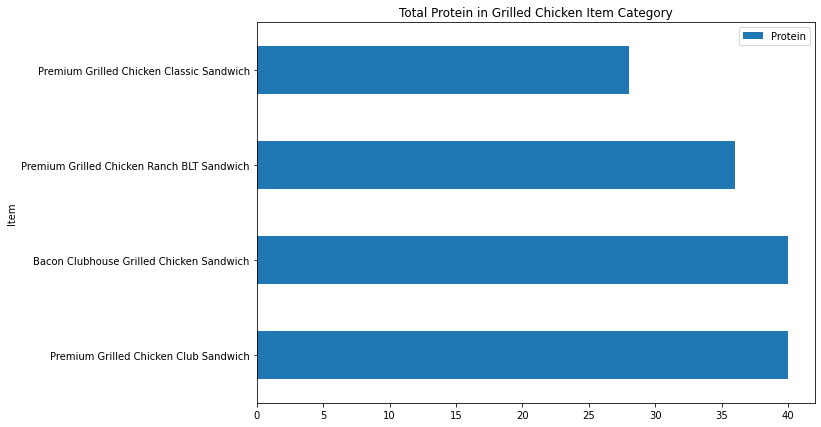

In [28]:
grilled_prot = pd.DataFrame({'Item':grilled['Item'], 'Protein':grilled['Protein']})
ax = grilled_prot.sort_values('Protein', ascending=False).plot.barh(x='Item', y='Protein', figsize= (10,7))
ax.set_title("Total Protein in Grilled Chicken Item Category")

In [29]:
avg_crispy_prot=round(crispy['Protein'].mean(), 3)
print("Average protein on Crispy Chicken category is", avg_crispy_prot,";")

avg_grilled_prot=round(grilled['Protein'].mean(), 3)
print("and average protein on Grilled Chicken category is", avg_grilled_prot)

Average protein on Crispy Chicken category is 29.8 ;
and average protein on Grilled Chicken category is 36.0


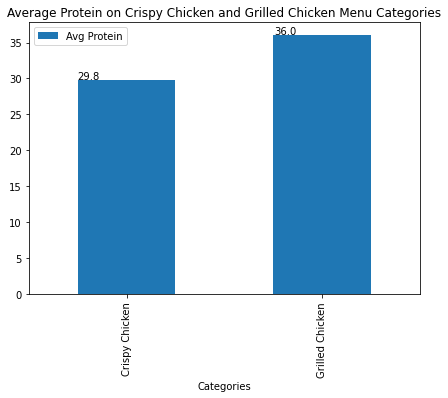

In [30]:
avg_prot = pd.DataFrame({'Categories':['Crispy Chicken', 'Grilled Chicken'], 'Avg Protein':[avg_crispy_prot, avg_grilled_prot]})
ax = avg_prot.plot.bar(x = 'Categories', y = 'Avg Protein', figsize=(7,5))
ax.set_title("Average Protein on Crispy Chicken and Grilled Chicken Menu Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


3. Carbohydrates, Sugar, and Dietary Fiber

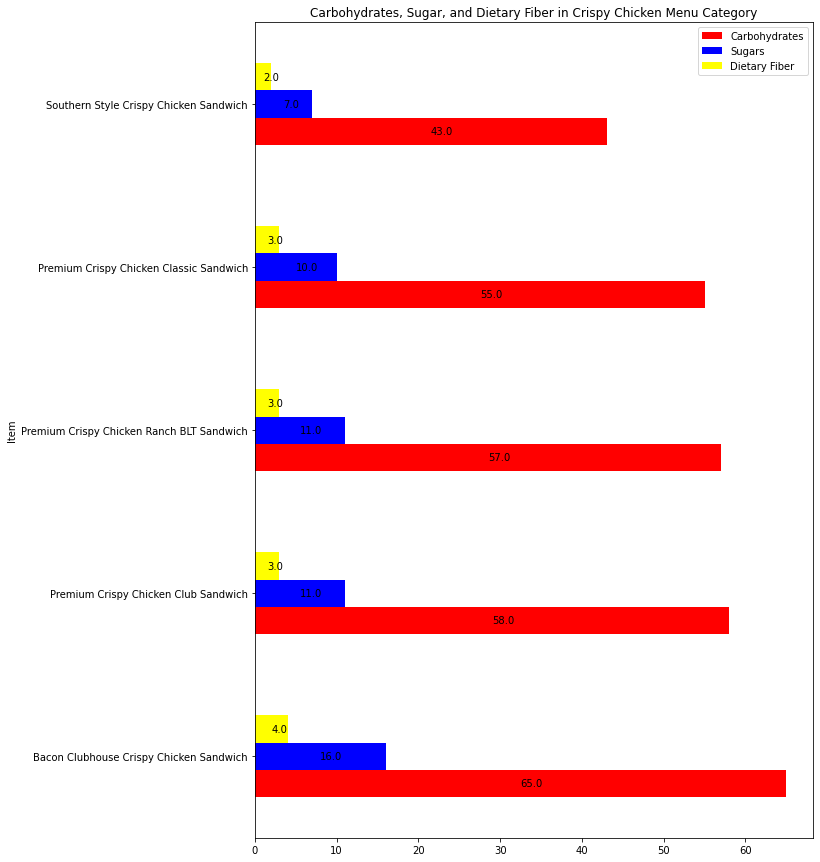

In [31]:
crispy_carnsu = pd.DataFrame({'Item':crispy['Item'], 'Carbohydrates':crispy['Carbohydrates'], 'Sugars':crispy['Sugars'], 'Dietary Fiber':crispy['Dietary Fiber']})
ax = crispy_carnsu.sort_values('Carbohydrates', ascending=False).plot.barh(x='Item', y=['Carbohydrates','Sugars', 'Dietary Fiber'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow'])
ax.set_title("Carbohydrates, Sugar, and Dietary Fiber in Crispy Chicken Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

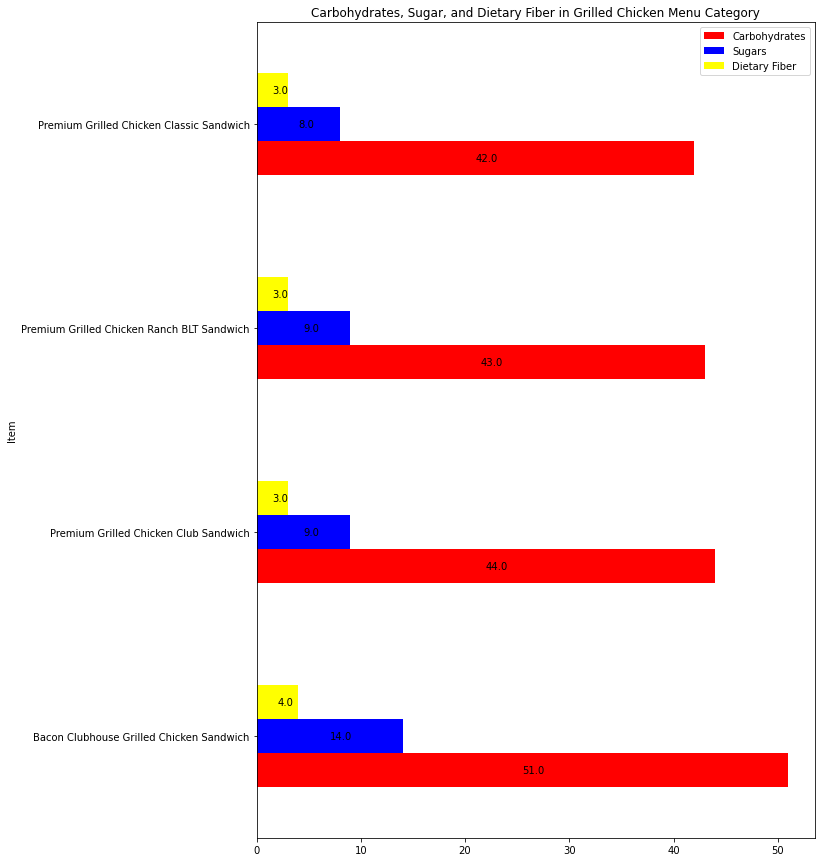

In [32]:
grilled_carnsu = pd.DataFrame({'Item':grilled['Item'], 'Carbohydrates':grilled['Carbohydrates'], 'Sugars':grilled['Sugars'], 'Dietary Fiber':grilled['Dietary Fiber']})
ax = grilled_carnsu.sort_values('Carbohydrates', ascending=False).plot.barh(x='Item', y=['Carbohydrates','Sugars', 'Dietary Fiber'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow'])
ax.set_title("Carbohydrates, Sugar, and Dietary Fiber in Grilled Chicken Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [33]:
avg_crispy_car = round(crispy['Carbohydrates'].mean(), 3)
avg_crispy_sug = round(crispy['Sugars'].mean(), 3)
avg_crispy_dv = round(crispy['Dietary Fiber'].mean(), 3)
print("1. The average amount of Carbohydrates in Crispy Chicken category is", avg_crispy_car, ", the average amount of Sugars is", avg_crispy_sug, "\nand the average of Dietary Fiber is", avg_crispy_dv)

avg_grilled_car = round(grilled['Carbohydrates'].mean(), 3)
avg_grilled_sug = round(grilled['Sugars'].mean(), 3)
avg_grilled_dv = round(grilled['Dietary Fiber'].mean(),3)
print("1. The average amount of Carbohydrates in Grilled Chicken category is", avg_grilled_car, ", and the average amount of Sugars is", avg_grilled_sug, "\nand the average of Dietary Fiber is", avg_grilled_dv)

1. The average amount of Carbohydrates in Crispy Chicken category is 55.6 , the average amount of Sugars is 11.0 
and the average of Dietary Fiber is 3.0
1. The average amount of Carbohydrates in Grilled Chicken category is 45.0 , and the average amount of Sugars is 10.0 
and the average of Dietary Fiber is 3.25


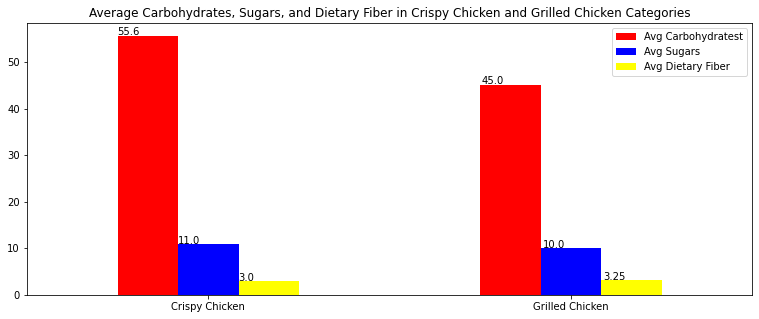

In [34]:
avg_car = [avg_crispy_car, avg_grilled_car]
avg_sug = [avg_crispy_sug, avg_grilled_sug]
avg_dv = [avg_crispy_dv, avg_grilled_dv]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_fat = pd.DataFrame({'Avg Carbohydratest': avg_car,
                   'Avg Sugars': avg_sug,
                       'Avg Dietary Fiber': avg_dv}, index=index)
ax = avg_fat.plot.bar(rot=0, color=['red', 'blue', 'yellow'], figsize=(13,5))
ax.set_title("Average Carbohydrates, Sugars, and Dietary Fiber in Crispy Chicken and Grilled Chicken Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

4. Vitamin and Mineral

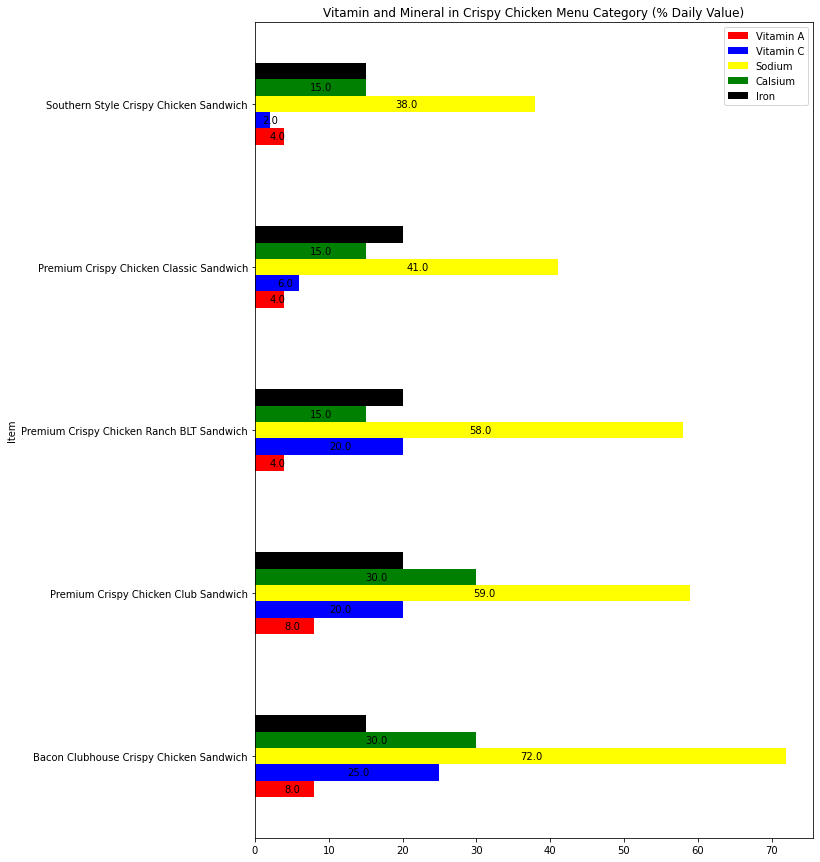

In [35]:
crispy_vnm = pd.DataFrame({'Item':crispy['Item'], 'Vitamin A':crispy['Vitamin A (% Daily Value)'], 'Vitamin C':crispy['Vitamin C (% Daily Value)'], 'Sodium':crispy['Sodium (% Daily Value)'], 'Calsium':crispy['Calcium (% Daily Value)'], 'Iron':crispy['Iron (% Daily Value)']})
ax = crispy_vnm.sort_values('Sodium', ascending=False).plot.barh(x='Item', y=['Vitamin A','Vitamin C', 'Sodium', 'Calsium', 'Iron'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green', 'black'])
ax.set_title("Vitamin and Mineral in Crispy Chicken Menu Category (% Daily Value)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

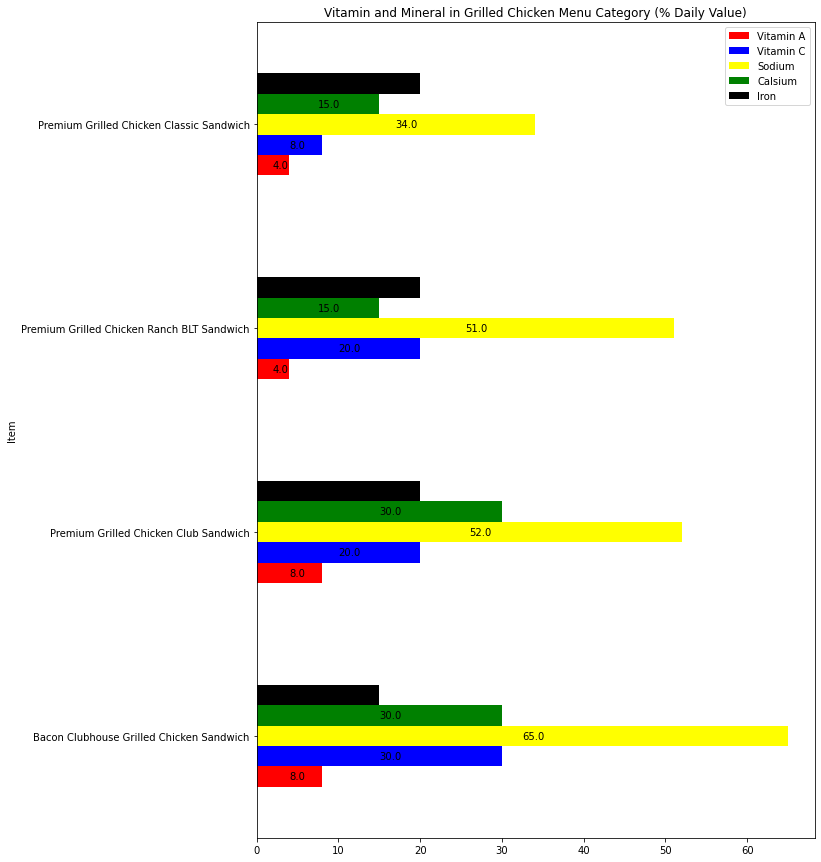

In [36]:
grilled_vnm = pd.DataFrame({'Item':grilled['Item'], 'Vitamin A':grilled['Vitamin A (% Daily Value)'], 'Vitamin C':grilled['Vitamin C (% Daily Value)'], 'Sodium':grilled['Sodium (% Daily Value)'], 'Calsium':grilled['Calcium (% Daily Value)'], 'Iron':grilled['Iron (% Daily Value)']})
ax = grilled_vnm.sort_values('Sodium', ascending=False).plot.barh(x='Item', y=['Vitamin A','Vitamin C', 'Sodium', 'Calsium', 'Iron'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green', 'black'])
ax.set_title("Vitamin and Mineral in Grilled Chicken Menu Category (% Daily Value)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [37]:
avg_crispy_vita = round(crispy['Vitamin A (% Daily Value)'].mean(), 3)
avg_crispy_vitc = round(crispy['Vitamin C (% Daily Value)'].mean(), 3)
avg_crispy_sod = round(crispy['Sodium (% Daily Value)'].mean(), 3)
avg_crispy_cal = round(crispy['Calcium (% Daily Value)'].mean(), 3)
avg_crispy_ir = round(crispy['Iron (% Daily Value)'].mean(), 3)
print("1. The average amount of Vitamin A in Crispy Chicken category is", avg_crispy_vita, "%DV, the average amount of Vitamin C is", avg_crispy_vitc, "%DV, \nthe average of Sodium is", avg_crispy_sod, "%DV, the average of Calcium is", avg_crispy_cal, "%DV, and the average of Iron is", avg_crispy_ir)

avg_grilled_vita = round(grilled['Vitamin A (% Daily Value)'].mean(), 3)
avg_grilled_vitc = round(grilled['Vitamin C (% Daily Value)'].mean(), 3)
avg_grilled_sod = round(grilled['Sodium (% Daily Value)'].mean(), 3)
avg_grilled_cal = round(grilled['Calcium (% Daily Value)'].mean(), 3)
avg_grilled_ir = round(grilled['Iron (% Daily Value)'].mean(), 3)
print("2. The average amount of Vitamin A in Grilled Chicken category is", avg_grilled_vita, "%DV, the average amount of Vitamin C is", avg_grilled_vitc, "%DV, \nthe average of Sodium is", avg_grilled_sod, "%DV, the average of Calcium is", avg_grilled_cal, "%DV, and the average of Iron is", avg_grilled_ir)

1. The average amount of Vitamin A in Crispy Chicken category is 5.6 %DV, the average amount of Vitamin C is 14.6 %DV, 
the average of Sodium is 53.6 %DV, the average of Calcium is 21.0 %DV, and the average of Iron is 18.0
2. The average amount of Vitamin A in Grilled Chicken category is 6.0 %DV, the average amount of Vitamin C is 19.5 %DV, 
the average of Sodium is 50.5 %DV, the average of Calcium is 22.5 %DV, and the average of Iron is 18.75


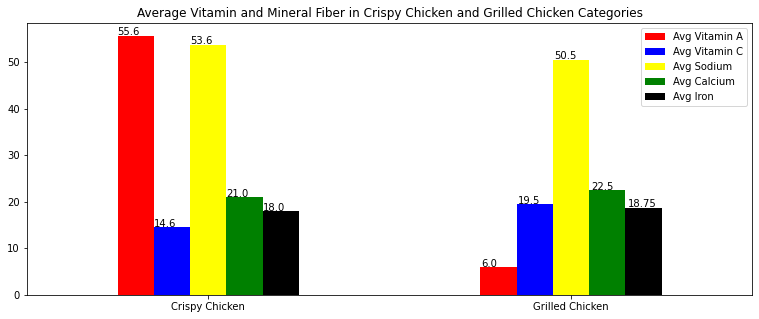

In [38]:
avg_vita = [avg_crispy_car, avg_grilled_vita]
avg_vitc = [avg_crispy_vitc, avg_grilled_vitc]
avg_sod = [avg_crispy_sod, avg_grilled_sod]
avg_cal = [avg_crispy_cal, avg_grilled_cal]
avg_ir = [avg_crispy_ir, avg_grilled_ir]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_fat = pd.DataFrame({'Avg Vitamin A': avg_vita, 'Avg Vitamin C': avg_vitc, 'Avg Sodium': avg_sod,
                       'Avg Calcium': avg_cal, 'Avg Iron': avg_ir}, index=index)
ax = avg_fat.plot.bar(rot=0, color=['red', 'blue', 'yellow', 'green', 'black'], figsize=(13,5))
ax.set_title("Average Vitamin and Mineral Fiber in Crispy Chicken and Grilled Chicken Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Problem 4

What about ordering egg whites instead of whole eggs? 

1. Fat

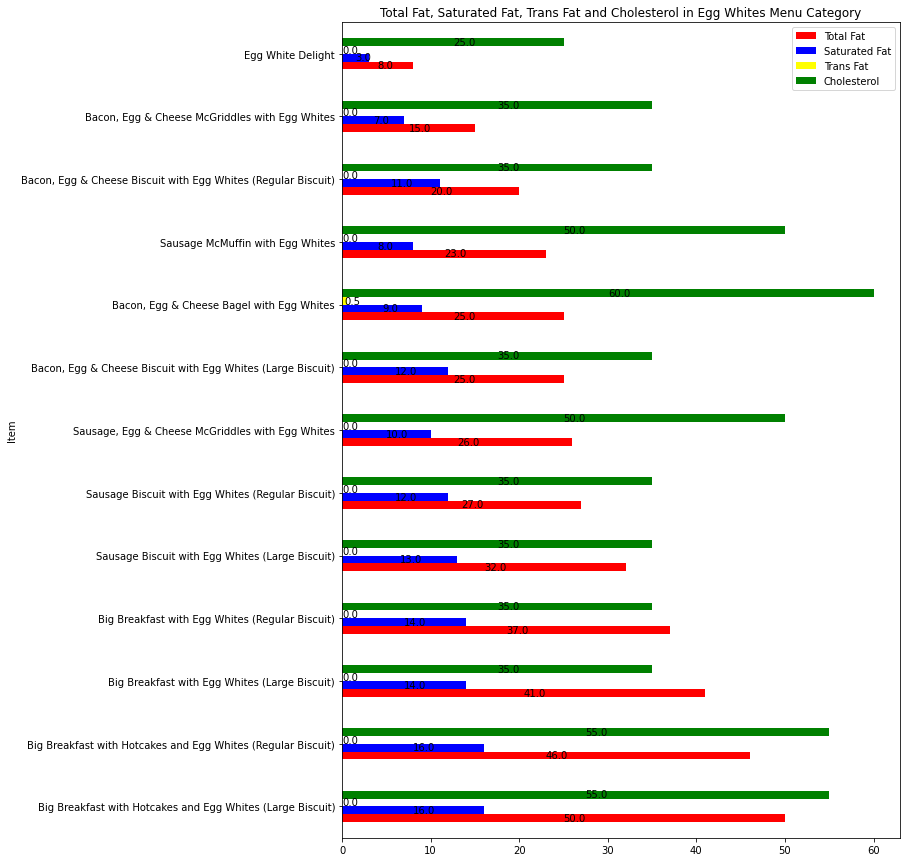

In [39]:
whites = menu[menu['Item'].str.contains('Egg White')]
whites_fat = pd.DataFrame({'Item':whites['Item'], 'Total Fat':whites['Total Fat'],
                           'Saturated Fat':whites['Saturated Fat'], 'Trans Fat':whites['Trans Fat'],
                           'Cholesterol':whites['Cholesterol']})
ax = whites_fat.sort_values('Total Fat', ascending=False).plot.barh(x='Item', y=['Total Fat','Saturated Fat', 'Trans Fat','Cholesterol'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green'])
ax.set_title("Total Fat, Saturated Fat, Trans Fat and Cholesterol in Egg Whites Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

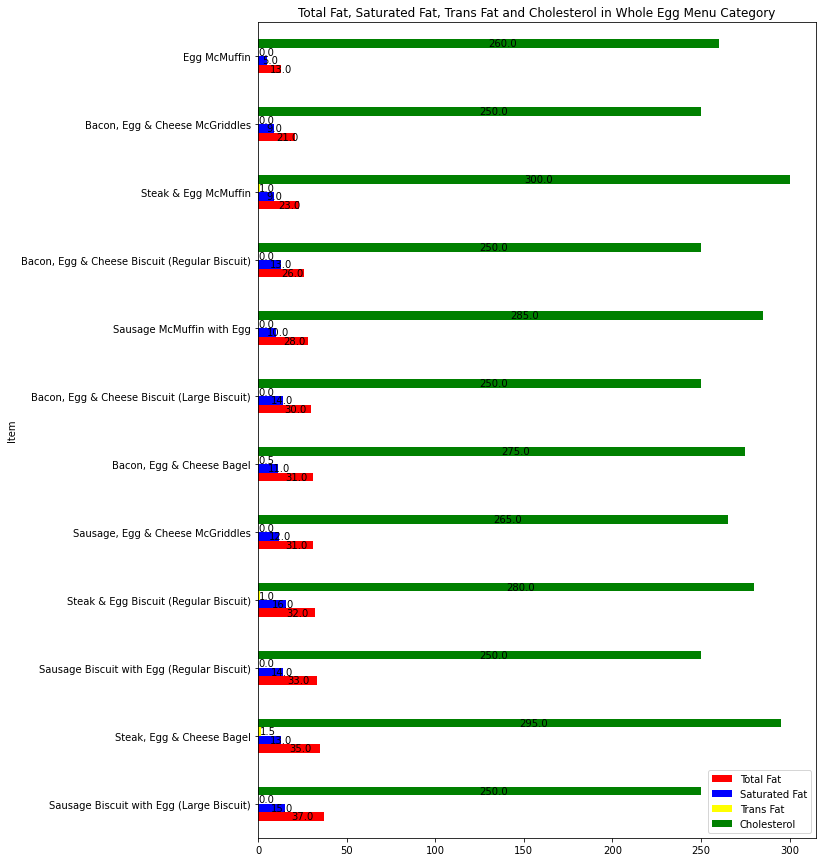

In [40]:
whole= menu[menu['Item'].str.contains('Egg')]
whole = whole[~whole['Item'].str.contains('White')]
whole_fat = pd.DataFrame({'Item':whole['Item'], 'Total Fat':whole['Total Fat'],
                           'Saturated Fat':whole['Saturated Fat'], 'Trans Fat':whole['Trans Fat'],
                           'Cholesterol':whole['Cholesterol']})
ax = whole_fat.sort_values('Total Fat', ascending=False).plot.barh(x='Item', y=['Total Fat','Saturated Fat', 'Trans Fat','Cholesterol'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green'])
ax.set_title("Total Fat, Saturated Fat, Trans Fat and Cholesterol in Whole Egg Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [41]:
avg_whites_totfat = round(whites['Total Fat'].mean(), 3)
avg_whites_satfat = round(whites['Saturated Fat'].mean(), 3)
avg_whites_tranfat = round(whites['Trans Fat'].mean(), 3)
avg_whites_col = round(whites['Cholesterol'].mean(), 3)
print("1. The average amount of Total Fat in white Egg category is", avg_whites_totfat, ", the average amount of Saturated Fat is", avg_whites_satfat, ",\nthe average amonut of Trans fat is", avg_whites_tranfat, ", and average amount of Colesterol is", avg_whites_col)


avg_whole_totfat = round(whole['Total Fat'].mean(), 3)
avg_whole_satfat = round(whole['Saturated Fat'].mean(), 3)
avg_whole_tranfat = round(whole['Trans Fat'].mean(), 3)
avg_whole_col = round(whole['Cholesterol'].mean(), 3)
print("2. The average amount of Total Fat in whole Egg category is", avg_whole_totfat, ", the average amount of Saturated Fat is", avg_whole_satfat, ",\nthe average amonut of Trans fat is", avg_whole_tranfat, ", and average amount of Colesterol is", avg_whole_col)

1. The average amount of Total Fat in white Egg category is 28.846 , the average amount of Saturated Fat is 11.154 ,
the average amonut of Trans fat is 0.038 , and average amount of Colesterol is 41.538
2. The average amount of Total Fat in whole Egg category is 28.333 , the average amount of Saturated Fat is 11.75 ,
the average amonut of Trans fat is 0.333 , and average amount of Colesterol is 267.5


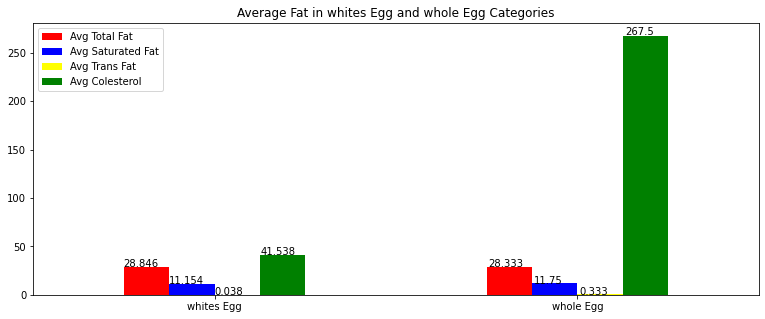

In [42]:
avg_totfat = [avg_whites_totfat, avg_whole_totfat]
avg_satfat = [avg_whites_satfat, avg_whole_satfat]
avg_tranfat = [avg_whites_tranfat, avg_whole_tranfat]
avg_col = [avg_whites_col, avg_whole_col]
index = ['whites Egg', 'whole Egg']
avg_fat = pd.DataFrame({'Avg Total Fat': avg_totfat,
                   'Avg Saturated Fat': avg_satfat,
                       'Avg Trans Fat': avg_tranfat,
                       'Avg Colesterol': avg_col}, index=index)
ax = avg_fat.plot.bar(rot=0, color=['red', 'blue', 'yellow', 'green'], figsize=(13,5))
ax.set_title("Average Fat in whites Egg and whole Egg Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

2. Protein

Text(0.5, 1.0, 'Total Protein in whites Chicken Item Category')

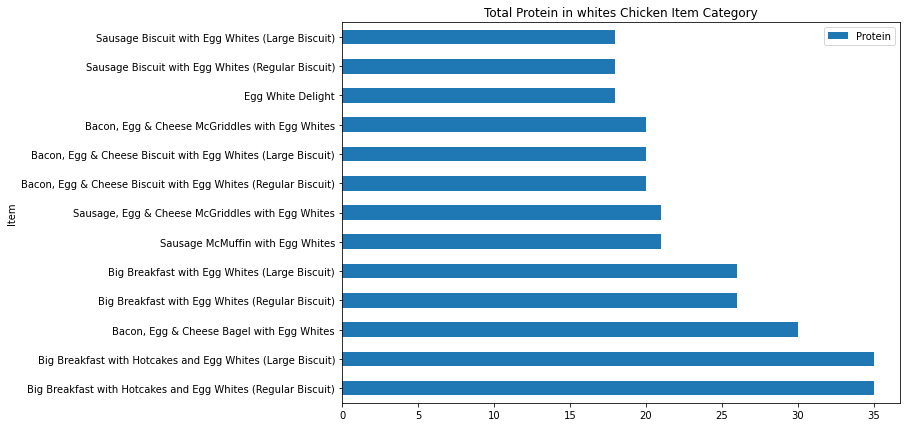

In [43]:
whites_prot = pd.DataFrame({'Item':whites['Item'], 'Protein':whites['Protein']})
ax = whites_prot.sort_values('Protein', ascending=False).plot.barh(x='Item', y='Protein', figsize= (10,7))
ax.set_title("Total Protein in whites Chicken Item Category")

Text(0.5, 1.0, 'Total Protein in whole Chicken Item Category')

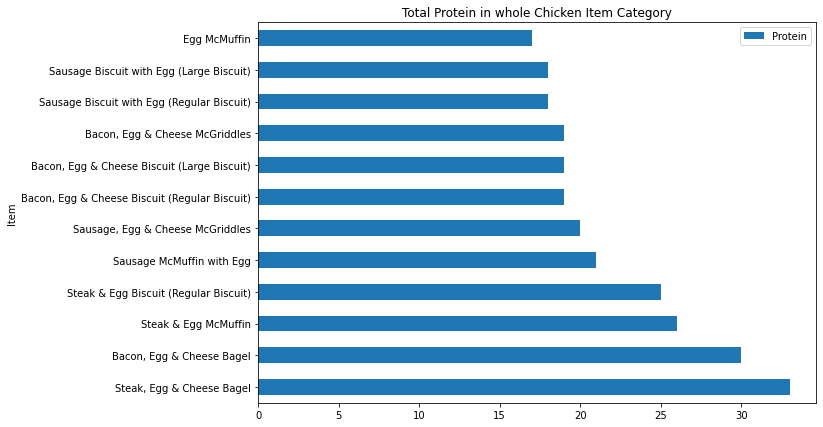

In [44]:
whole_prot = pd.DataFrame({'Item':whole['Item'], 'Protein':whole['Protein']})
ax = whole_prot.sort_values('Protein', ascending=False).plot.barh(x='Item', y='Protein', figsize= (10,7))
ax.set_title("Total Protein in whole Chicken Item Category")

In [45]:
avg_whites_prot=round(whites['Protein'].mean(), 3)
print("Average protein on whites Egg category is", avg_whites_prot,";")

avg_whole_prot=round(whole['Protein'].mean(), 3)
print("and average protein on whole Egg category is", avg_whole_prot)

Average protein on whites Egg category is 23.692 ;
and average protein on whole Egg category is 22.083


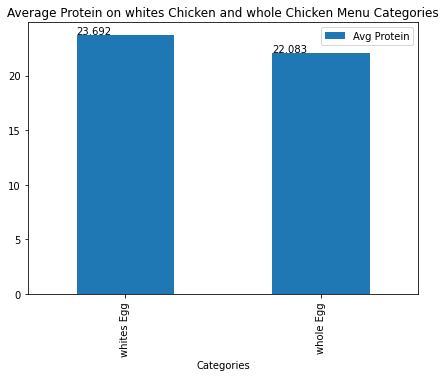

In [46]:
avg_prot = pd.DataFrame({'Categories':['whites Egg', 'whole Egg'], 'Avg Protein':[avg_whites_prot, avg_whole_prot]})
ax = avg_prot.plot.bar(x = 'Categories', y = 'Avg Protein', figsize=(7,5))
ax.set_title("Average Protein on whites Chicken and whole Chicken Menu Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

3. Carbohydrates, Sugars, and Dietary Fiber

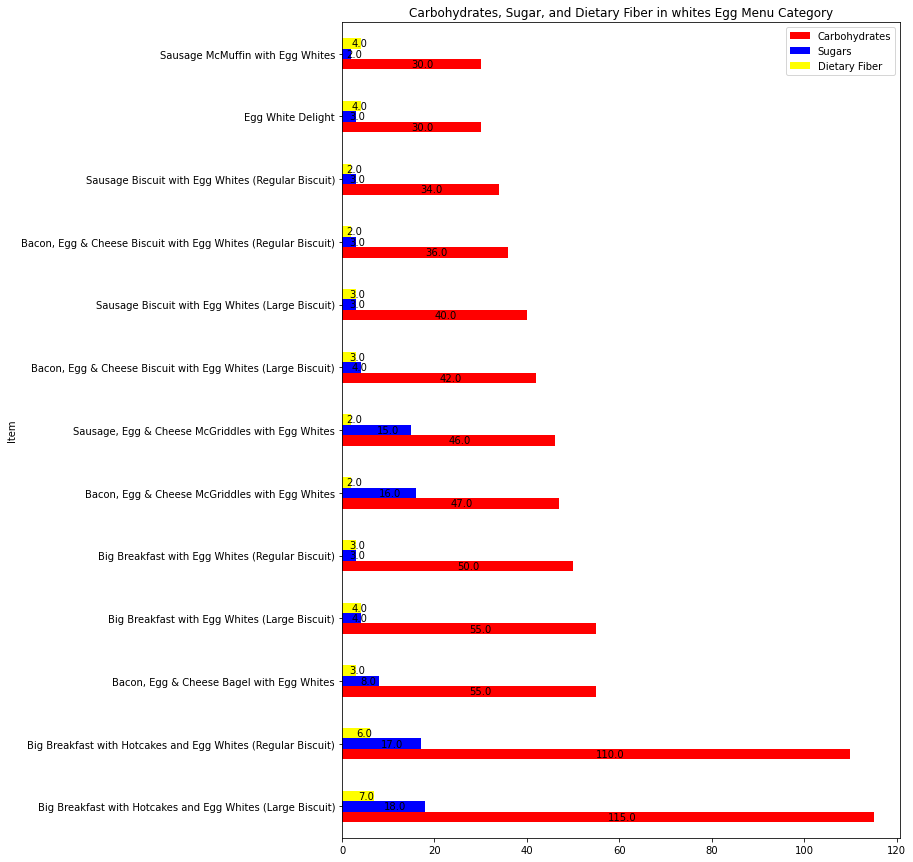

In [47]:
whites_carnsu = pd.DataFrame({'Item':whites['Item'], 'Carbohydrates':whites['Carbohydrates'], 'Sugars':whites['Sugars'], 'Dietary Fiber':whites['Dietary Fiber']})
ax = whites_carnsu.sort_values('Carbohydrates', ascending=False).plot.barh(x='Item', y=['Carbohydrates','Sugars', 'Dietary Fiber'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow'])
ax.set_title("Carbohydrates, Sugar, and Dietary Fiber in whites Egg Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')


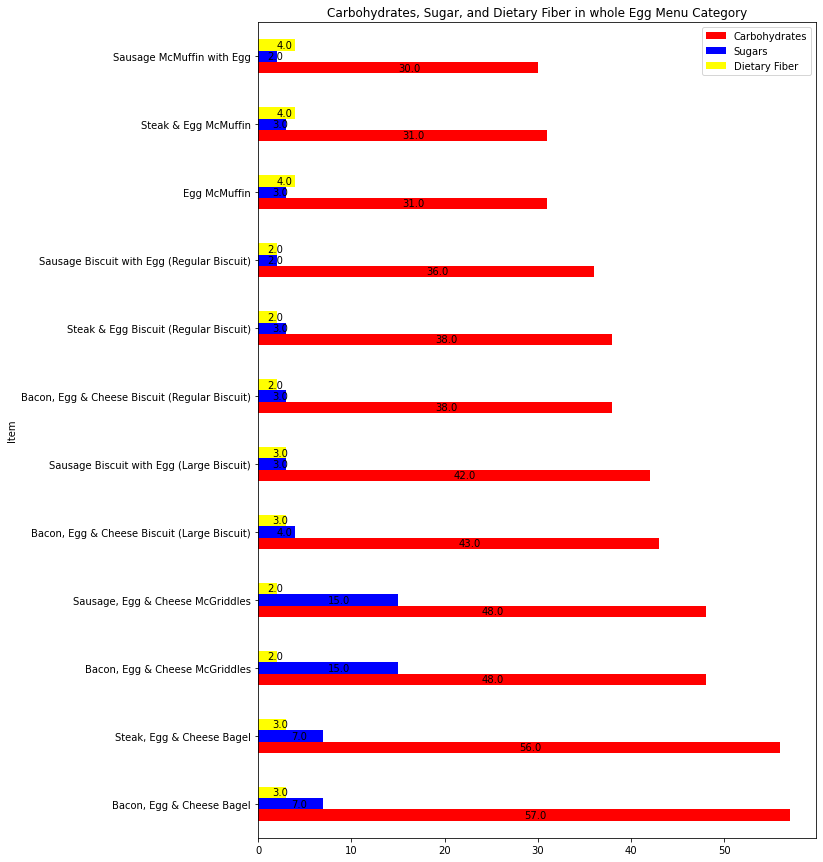

In [48]:
whole_carnsu = pd.DataFrame({'Item':whole['Item'], 'Carbohydrates':whole['Carbohydrates'], 'Sugars':whole['Sugars'], 'Dietary Fiber':whole['Dietary Fiber']})
ax = whole_carnsu.sort_values('Carbohydrates', ascending=False).plot.barh(x='Item', y=['Carbohydrates','Sugars', 'Dietary Fiber'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow'])
ax.set_title("Carbohydrates, Sugar, and Dietary Fiber in whole Egg Menu Category")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [49]:
avg_whites_car = round(whites['Carbohydrates'].mean(), 3)
avg_whites_sug = round(whites['Sugars'].mean(), 3)
avg_whites_dv = round(whites['Dietary Fiber'].mean(), 3)
print("1. The average amount of Carbohydrates in whites Egg category is", avg_whites_car, ", the average amount of Sugars is", avg_whites_sug, "\nand the average of Dietary Fiber is", avg_whites_dv)

avg_whole_car = round(whole['Carbohydrates'].mean(), 3)
avg_whole_sug = round(whole['Sugars'].mean(), 3)
avg_whole_dv = round(whole['Dietary Fiber'].mean(),3)
print("2. The average amount of Carbohydrates in whole Egg category is", avg_whole_car, ", and the average amount of Sugars is", avg_whole_sug, "\nand the average of Dietary Fiber is", avg_whole_dv)


1. The average amount of Carbohydrates in whites Egg category is 53.077 , the average amount of Sugars is 7.615 
and the average of Dietary Fiber is 3.462
2. The average amount of Carbohydrates in whole Egg category is 41.5 , and the average amount of Sugars is 5.583 
and the average of Dietary Fiber is 2.833


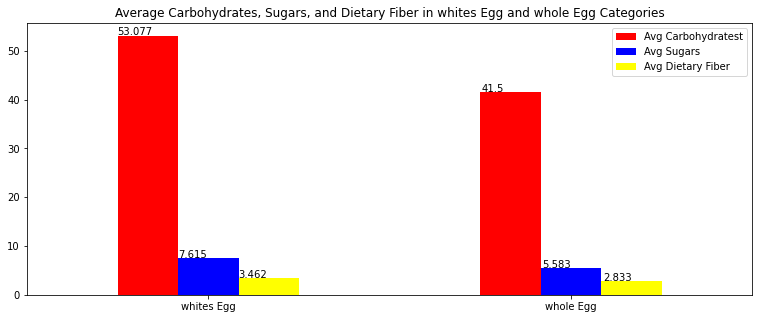

In [50]:
avg_car = [avg_whites_car, avg_whole_car]
avg_sug = [avg_whites_sug, avg_whole_sug]
avg_dv = [avg_whites_dv, avg_whole_dv]
index = ['whites Egg', 'whole Egg']
avg_fat = pd.DataFrame({'Avg Carbohydratest': avg_car,
                   'Avg Sugars': avg_sug,
                       'Avg Dietary Fiber': avg_dv}, index=index)
ax = avg_fat.plot.bar(rot=0, color=['red', 'blue', 'yellow'], figsize=(13,5))
ax.set_title("Average Carbohydrates, Sugars, and Dietary Fiber in whites Egg and whole Egg Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

4. Vitamin and Mineral

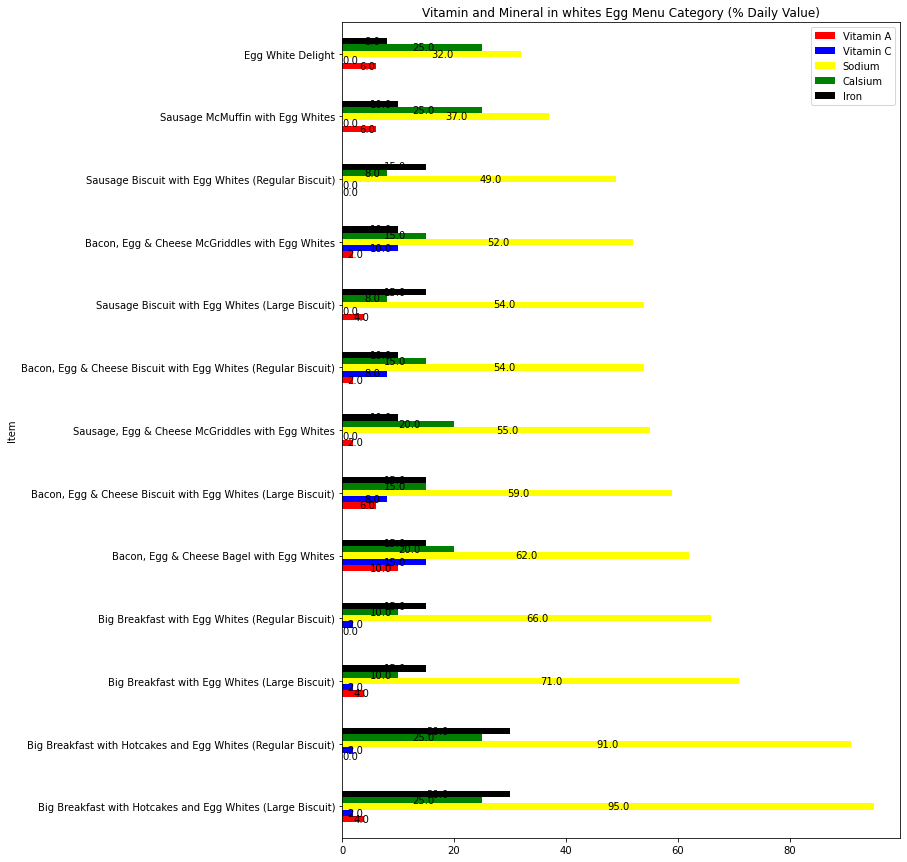

In [51]:
whites_vnm = pd.DataFrame({'Item':whites['Item'], 'Vitamin A':whites['Vitamin A (% Daily Value)'], 'Vitamin C':whites['Vitamin C (% Daily Value)'], 'Sodium':whites['Sodium (% Daily Value)'], 'Calsium':whites['Calcium (% Daily Value)'], 'Iron':whites['Iron (% Daily Value)']})
ax = whites_vnm.sort_values('Sodium', ascending=False).plot.barh(x='Item', y=['Vitamin A','Vitamin C', 'Sodium', 'Calsium', 'Iron'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green', 'black'])
ax.set_title("Vitamin and Mineral in whites Egg Menu Category (% Daily Value)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

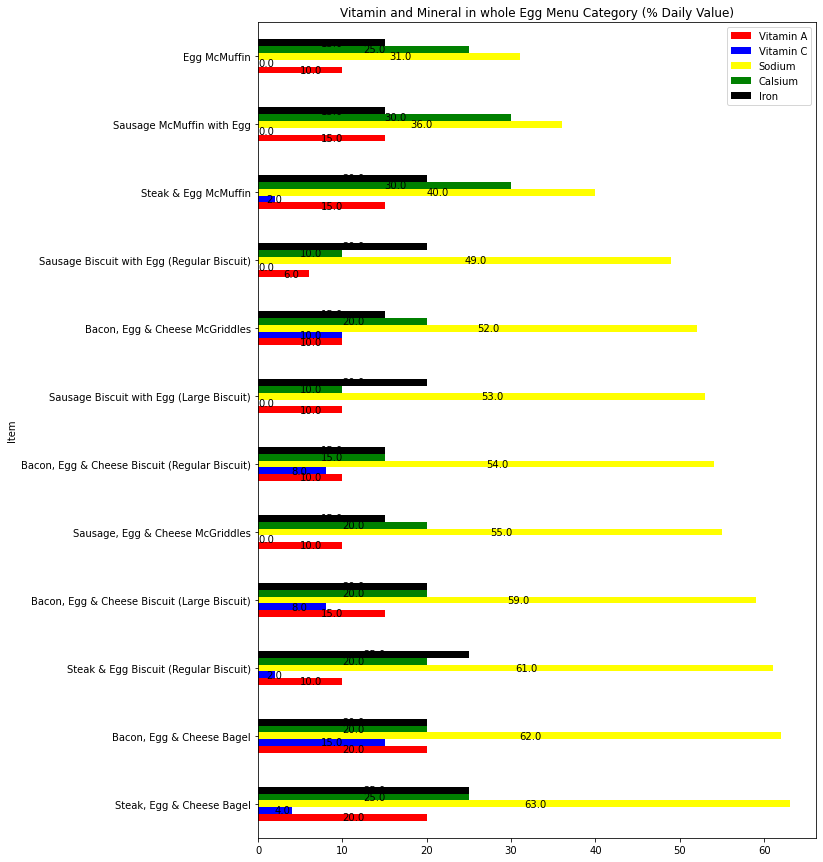

In [52]:
whole_vnm = pd.DataFrame({'Item':whole['Item'], 'Vitamin A':whole['Vitamin A (% Daily Value)'], 'Vitamin C':whole['Vitamin C (% Daily Value)'], 'Sodium':whole['Sodium (% Daily Value)'], 'Calsium':whole['Calcium (% Daily Value)'], 'Iron':whole['Iron (% Daily Value)']})
ax = whole_vnm.sort_values('Sodium', ascending=False).plot.barh(x='Item', y=['Vitamin A','Vitamin C', 'Sodium', 'Calsium', 'Iron'], stacked=False, figsize= (10,15), color=['red', 'blue', 'yellow', 'green', 'black'])
ax.set_title("Vitamin and Mineral in whole Egg Menu Category (% Daily Value)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center')

In [53]:
avg_whites_vita = round(whites['Vitamin A (% Daily Value)'].mean(), 3)
avg_whites_vitc = round(whites['Vitamin C (% Daily Value)'].mean(), 3)
avg_whites_sod = round(whites['Sodium (% Daily Value)'].mean(), 3)
avg_whites_cal = round(whites['Calcium (% Daily Value)'].mean(), 3)
avg_whites_ir = round(whites['Iron (% Daily Value)'].mean(), 3)
print("1. The average amount of Vitamin A in whites Egg category is", avg_whites_vita, "%DV, the average amount of Vitamin C is", avg_whites_vitc, "%DV, \nthe average of Sodium is", avg_whites_sod, "%DV, the average of Calcium is", avg_whites_cal, "%DV, and the average of Iron is", avg_whites_ir)

avg_whole_vita = round(whole['Vitamin A (% Daily Value)'].mean(), 3)
avg_whole_vitc = round(whole['Vitamin C (% Daily Value)'].mean(), 3)
avg_whole_sod = round(whole['Sodium (% Daily Value)'].mean(), 3)
avg_whole_cal = round(whole['Calcium (% Daily Value)'].mean(), 3)
avg_whole_ir = round(whole['Iron (% Daily Value)'].mean(), 3)
print("2. The average amount of Vitamin A in whole Egg category is", avg_whole_vita, "%DV, the average amount of Vitamin C is", avg_whole_vitc, "%DV, \nthe average of Sodium is", avg_whole_sod, "%DV, the average of Calcium is", avg_whole_cal, "%DV, and the average of Iron is", avg_whole_ir)

1. The average amount of Vitamin A in whites Egg category is 3.538 %DV, the average amount of Vitamin C is 3.769 %DV, 
the average of Sodium is 59.769 %DV, the average of Calcium is 17.0 %DV, and the average of Iron is 15.231
2. The average amount of Vitamin A in whole Egg category is 12.583 %DV, the average amount of Vitamin C is 4.083 %DV, 
the average of Sodium is 51.25 %DV, the average of Calcium is 20.417 %DV, and the average of Iron is 18.75


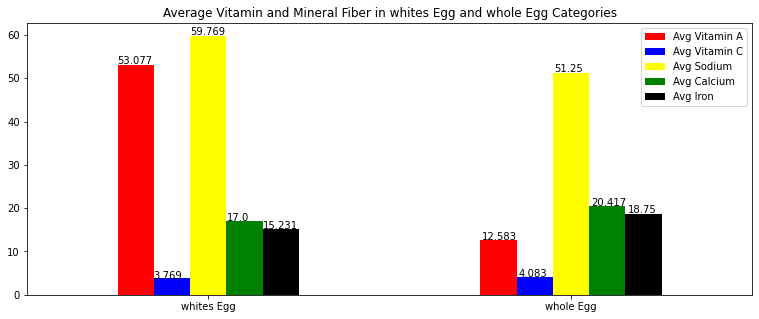

In [54]:
avg_vita = [avg_whites_car, avg_whole_vita]
avg_vitc = [avg_whites_vitc, avg_whole_vitc]
avg_sod = [avg_whites_sod, avg_whole_sod]
avg_cal = [avg_whites_cal, avg_whole_cal]
avg_ir = [avg_whites_ir, avg_whole_ir]
index = ['whites Egg', 'whole Egg']
avg_fat = pd.DataFrame({'Avg Vitamin A': avg_vita, 'Avg Vitamin C': avg_vitc, 'Avg Sodium': avg_sod,
                       'Avg Calcium': avg_cal, 'Avg Iron': avg_ir}, index=index)
ax = avg_fat.plot.bar(rot=0, color=['red', 'blue', 'yellow', 'green', 'black'], figsize=(13,5))
ax.set_title("Average Vitamin and Mineral Fiber in whites Egg and whole Egg Categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Problem 5


What is the least number of items could you order from the menu to meet one day's nutritional requirements?

In [55]:
!pip install pulp

You should consider upgrading via the 'c:\users\my computer\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [56]:
from pulp import *

In [57]:
def LPModel(threshold,tolerant=0,morethan = True, lessthan = False):
    model = LpProblem(name="small-problem", sense=LpMinimize)
    
    menu_item = menu['Item'].to_list()
    costs = dict(zip(menu_item,[1]*len(menu_item)))
    calories = dict(zip(menu_item,(menu['Calories']/2250)*100)) ##assumes daily calories needs is average between men and women
    fat = dict(zip(menu_item,menu['Total Fat (% Daily Value)']))
    sat_fat = dict(zip(menu_item,menu['Saturated Fat (% Daily Value)']))
    cholesterol = dict(zip(menu_item,menu['Cholesterol (% Daily Value)']))
    sodium = dict(zip(menu_item,menu['Sodium (% Daily Value)']))
    carbs = dict(zip(menu_item,menu['Carbohydrates (% Daily Value)']))
    dietary_fiber = dict(zip(menu_item,menu['Dietary Fiber (% Daily Value)']))
    sugar = dict(zip(menu_item,(menu['Sugars']/32)*100)) ##assumes daily sugar needs is 32 (Avarege from https://www.healthline.com/)
    protein = dict(zip(menu_item,(menu['Protein']/51)*100)) ##assumes daily protein needs is 51 (Avarege from https://www.healthline.com/)
    vit_a = dict(zip(menu_item,menu['Vitamin A (% Daily Value)']))
    vit_c = dict(zip(menu_item,menu['Vitamin C (% Daily Value)']))
    calcium = dict(zip(menu_item,menu['Calcium (% Daily Value)']))
    iron = dict(zip(menu_item,menu['Iron (% Daily Value)']))
    
    food_vars = LpVariable.dicts('Menu',menu_item,lowBound=0,cat='Integer') #We cannot order a half of big mac ofc, set minimum order to 0

    model += lpSum([costs[i]*food_vars[i] for i in menu_item])
    
    i = threshold
    b = tolerant
    
    if lessthan:
        model += lpSum([calories[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([fat[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([sat_fat[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([cholesterol[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([sodium[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([carbs[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([dietary_fiber[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([sugar[f]* food_vars[f] for f in menu_item])<= i+b
        model += lpSum([protein[f]* food_vars[f] for f in menu_item])<= i+b
        model += lpSum([vit_a[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([vit_c[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([calcium[f] * food_vars[f] for f in menu_item]) <= i+b
        model += lpSum([iron[f] * food_vars[f] for f in menu_item]) <= i+b
        
    if morethan:
        model += lpSum([calories[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([fat[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([sat_fat[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([cholesterol[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([sodium[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([carbs[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([dietary_fiber[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([sugar[f]* food_vars[f] for f in menu_item])>= i-b
        model += lpSum([protein[f]* food_vars[f] for f in menu_item])>= i-b
        model += lpSum([vit_a[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([vit_c[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([calcium[f] * food_vars[f] for f in menu_item]) >= i-b
        model += lpSum([iron[f] * food_vars[f] for f in menu_item]) >= i-b

    model.solve()
    
    print("Status:", LpStatus[model.status])
    
    ideal_item_name = []
    ideal_item_count = []
    for v in model.variables():
        if v.varValue>0:
            ideal_item_name.append(v.name)
            ideal_item_count.append(v.varValue)
    dic = {'Items':ideal_item_name,
          'Count':ideal_item_count}
    df_opt = pd.DataFrame(dic)
    df_opt.replace('Menu_','',inplace = True,regex=True)
    df_opt.replace("_", " ",inplace = True,regex=True)
    
    return df_opt

1. Asumsi bahwa setiap nutrisi harus lebih dari 100% kebutuhan harian

In [58]:
df_opt = LPModel(100,morethan = True, lessthan = False)
df_opt

Status: Optimal


,Items,Count
0,Big Breakfast with Hotcakes (Large Biscuit),3.0
1,Fruit & Maple Oatmeal without Brown Sugar,1.0
2,Premium Southwest Salad with Grilled Chicken,1.0


In [59]:
df_opt.shape

(3, 2)

In [60]:
header = menu.columns.to_list()
header

['Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

In [61]:
df_ideal = pd.DataFrame(columns = header)

for i in range(df_opt.shape[0]):
    df_ideal = df_ideal.append(menu[menu['Item'] == df_opt['Items'][i]])
    df_ideal.reset_index(drop = True,inplace = True)
    df_ideal.loc[i,'Serving Size':'Iron (% Daily Value)']*=df_opt['Count'][i]
df_ideal

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1302.0,3450,1620,180.0,279,60.0,300,0.0,...,348,117,21,84,51,108,45,6,90,120
1,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,251.0,260,40,4.0,6,1.5,8,0.0,...,49,16,5,22,18,5,2,130,6,10
2,Salads,Premium Southwest Salad with Grilled Chicken,335.0,290,80,8.0,13,2.5,13,0.0,...,28,9,7,28,10,27,170,30,15,15


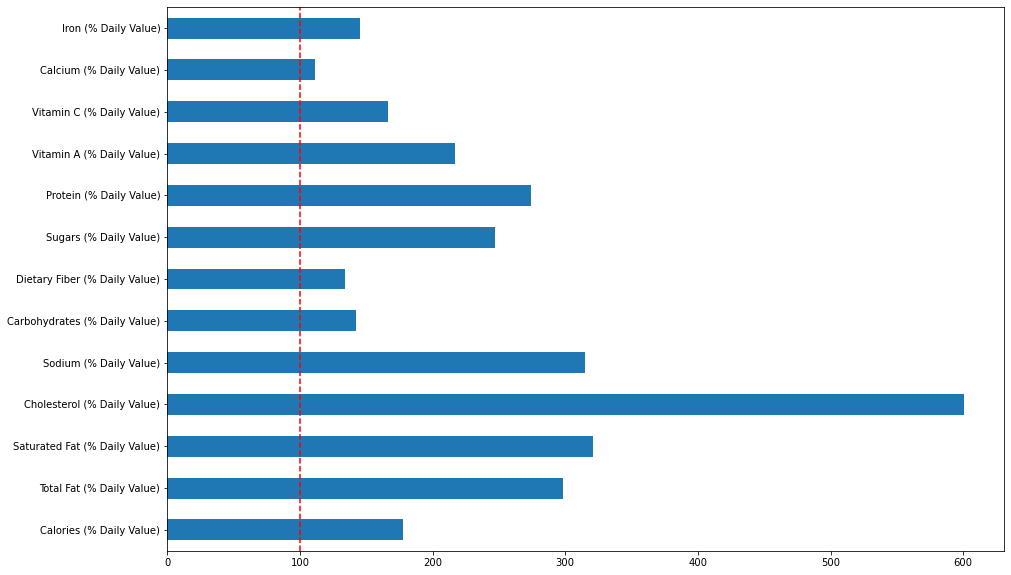

In [62]:
df_ideal['Calories (% Daily Value)'] = df_ideal['Calories']*100/2250
df_ideal['Sugars (% Daily Value)'] = df_ideal['Sugars']*100/32
df_ideal['Protein (% Daily Value)'] = df_ideal['Protein']*100/51

df_ideal[['Calories (% Daily Value)','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)',
         'Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Sugars (% Daily Value)','Protein (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
        'Iron (% Daily Value)']].sum().plot(kind='barh',figsize = (15,10))

plt.axvline(x=100,color = 'Red',linestyle =  '--')

2. Asumsi bahwa setiap nitrisi boleh kurang dari 100% kebutuhan harian dengan batas toleransi 30 (nutrisi harus lebih dari 100-30 tetapi harus kurang dari 100+30

In [63]:
df_opt_2 = LPModel(100,30,morethan = True, lessthan = True)
df_opt_2

Status: Optimal


,Items,Count
0,Big Mac,1.0
1,Egg McMuffin,1.0
2,Hotcakes,1.0
3,Large French Fries,1.0
4,Side Salad,2.0


In [64]:
df_ideal_2 = pd.DataFrame(columns = header)

for i in range(df_opt_2.shape[0]):
    df_ideal_2 = df_ideal_2.append(menu[menu['Item'] == df_opt_2['Items'][i]])
    df_ideal_2.reset_index(drop = True,inplace = True)
    df_ideal_2.loc[i,'Serving Size':'Iron (% Daily Value)']*=df_opt_2['Count'][i]
df_ideal_2

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Beef & Pork,Big Mac,211.0,530,240,27.0,42,10.0,48,1.0,...,47,16,3,13,9,24,6,2,25,25
1,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
2,Breakfast,Hotcakes,151.0,350,80,9.0,13,2.0,9,0.0,...,60,20,3,10,14,8,0,0,15,15
3,Snacks & Sides,Large French Fries,168.0,510,220,24.0,37,3.5,17,0.0,...,67,22,5,22,0,6,0,70,2,8
4,Snacks & Sides,Side Salad,174.0,40,0,0.0,0,0.0,0,0.0,...,8,2,2,12,4,2,90,50,4,8


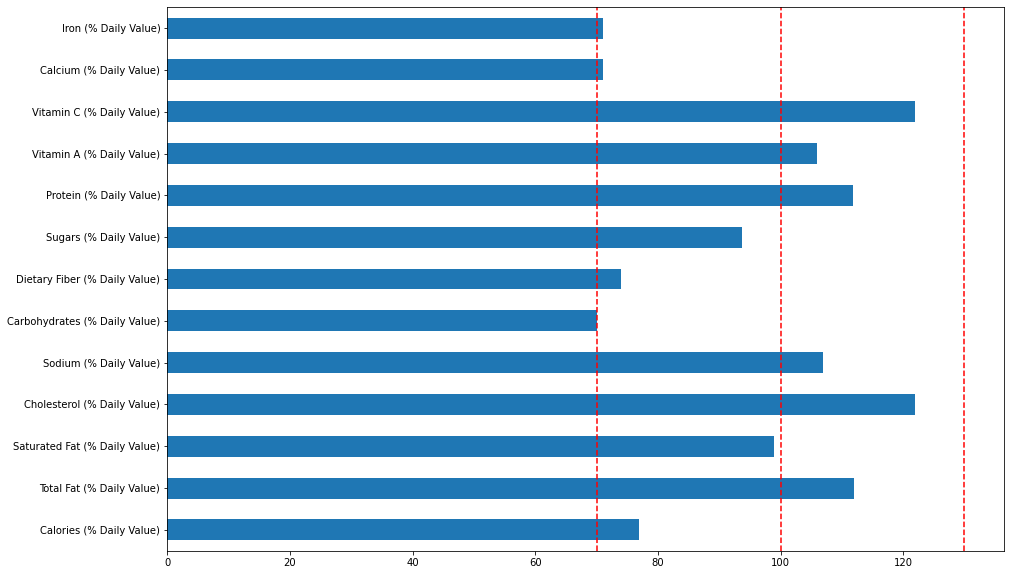

In [65]:
df_ideal_2['Calories (% Daily Value)'] = df_ideal_2['Calories']*100/2250
df_ideal_2['Sugars (% Daily Value)'] = df_ideal_2['Sugars']*100/32
df_ideal_2['Protein (% Daily Value)'] = df_ideal_2['Protein']*100/51

df_ideal_2[['Calories (% Daily Value)','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)',
         'Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Sugars (% Daily Value)','Protein (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
        'Iron (% Daily Value)']].sum().plot(kind='barh',figsize = (15,10))

plt.axvline(x=100,color = 'Red',linestyle =  '--') #threshold
plt.axvline(x=130,color = 'Red',linestyle =  '--') #treshold+tolerant
plt.axvline(x=70,color = 'Red',linestyle =  '--') #treshold-tolerant

2. Asumsi bahwa setiap nitrisi boleh kurang dari 100% kebutuhan harian dengan batas toleransi 25 (nutrisi harus lebih dari 100-25 tetapi harus kurang dari 100+25

In [66]:
df_opt_3 = LPModel(100, 25,morethan = True, lessthan = True)
df_opt_3

Status: Optimal


,Items,Count
0,Cheeseburger,2.0
1,Egg McMuffin,1.0
2,Hotcakes,1.0
3,Large French Fries,1.0
4,Side Salad,2.0


In [67]:
df_ideal_3 = pd.DataFrame(columns = header)

for i in range(df_opt_3.shape[0]):
    df_ideal_3 = df_ideal_3.append(menu[menu['Item'] == df_opt_3['Items'][i]])
    df_ideal_3.reset_index(drop = True,inplace = True)
    df_ideal_3.loc[i,'Serving Size':'Iron (% Daily Value)']*=df_opt_3['Count'][i]
df_ideal_3

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Beef & Pork,Cheeseburger,226.0,580,200,22.0,36,10.0,54,1.0,...,66,22,4,14,14,30,12,4,40,30
1,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
2,Breakfast,Hotcakes,151.0,350,80,9.0,13,2.0,9,0.0,...,60,20,3,10,14,8,0,0,15,15
3,Snacks & Sides,Large French Fries,168.0,510,220,24.0,37,3.5,17,0.0,...,67,22,5,22,0,6,0,70,2,8
4,Snacks & Sides,Side Salad,174.0,40,0,0.0,0,0.0,0,0.0,...,8,2,2,12,4,2,90,50,4,8


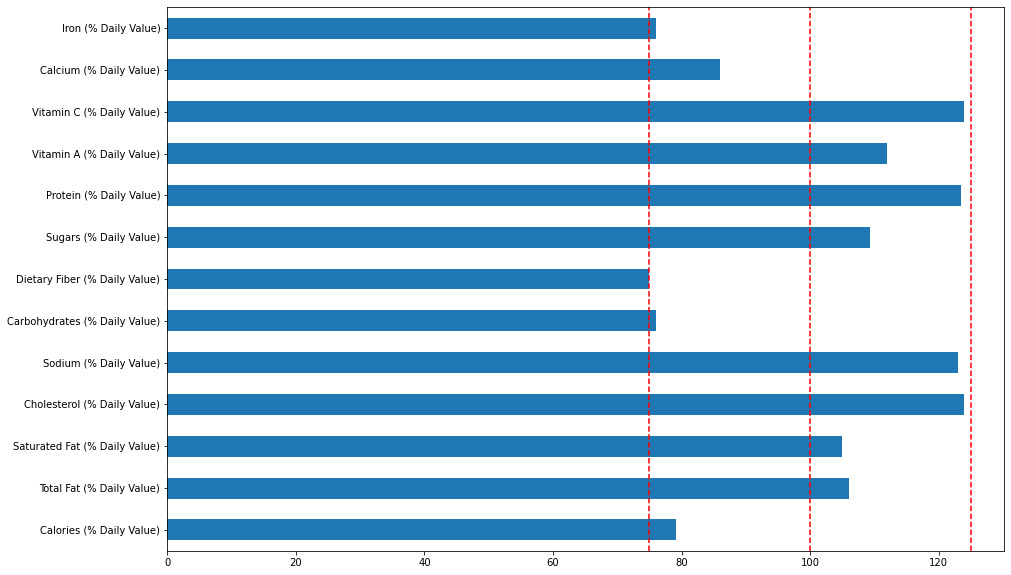

In [68]:
df_ideal_3['Calories (% Daily Value)'] = df_ideal_3['Calories']*100/2250
df_ideal_3['Sugars (% Daily Value)'] = df_ideal_3['Sugars']*100/32
df_ideal_3['Protein (% Daily Value)'] = df_ideal_3['Protein']*100/51

df_ideal_3[['Calories (% Daily Value)','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)',
         'Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Sugars (% Daily Value)','Protein (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
        'Iron (% Daily Value)']].sum().plot(kind='barh',figsize = (15,10))

plt.axvline(x=100,color = 'Red',linestyle =  '--') #threshold
plt.axvline(x=125,color = 'Red',linestyle =  '--') #treshold+tolerant
plt.axvline(x=75,color = 'Red',linestyle =  '--') #treshold-tolerant